In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv('../datasets/kc_house_data.csv')

In [3]:
# Converter em notacao cientifica 
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# Crie uma nova coluna chamada: “dormitory_type”
    #  Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    #  Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    #  Se o valor da coluna “bedrooms” for maior que 2 => ‘house’
# 1. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.
# 2. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.
# 3. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.
# 4. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos móveis, a partir do ano de 1930.
# 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.
# 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )
# 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )
# 9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )
# 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [5]:
# Crie uma nova coluna chamada: “dormitory_type”
    #  Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    #  Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    #  Se o valor da coluna “bedrooms” for maior que 2 => ‘house’
    

In [6]:
data['dormitory_type'] = data['bedrooms'].apply( lambda x : 'studio' if x == 1 else
                                                            'apartament' if x == 2 else 
                                                            'house' if x > 2 else'NA' )

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,house
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,house
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,apartament
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,house
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,house


# Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

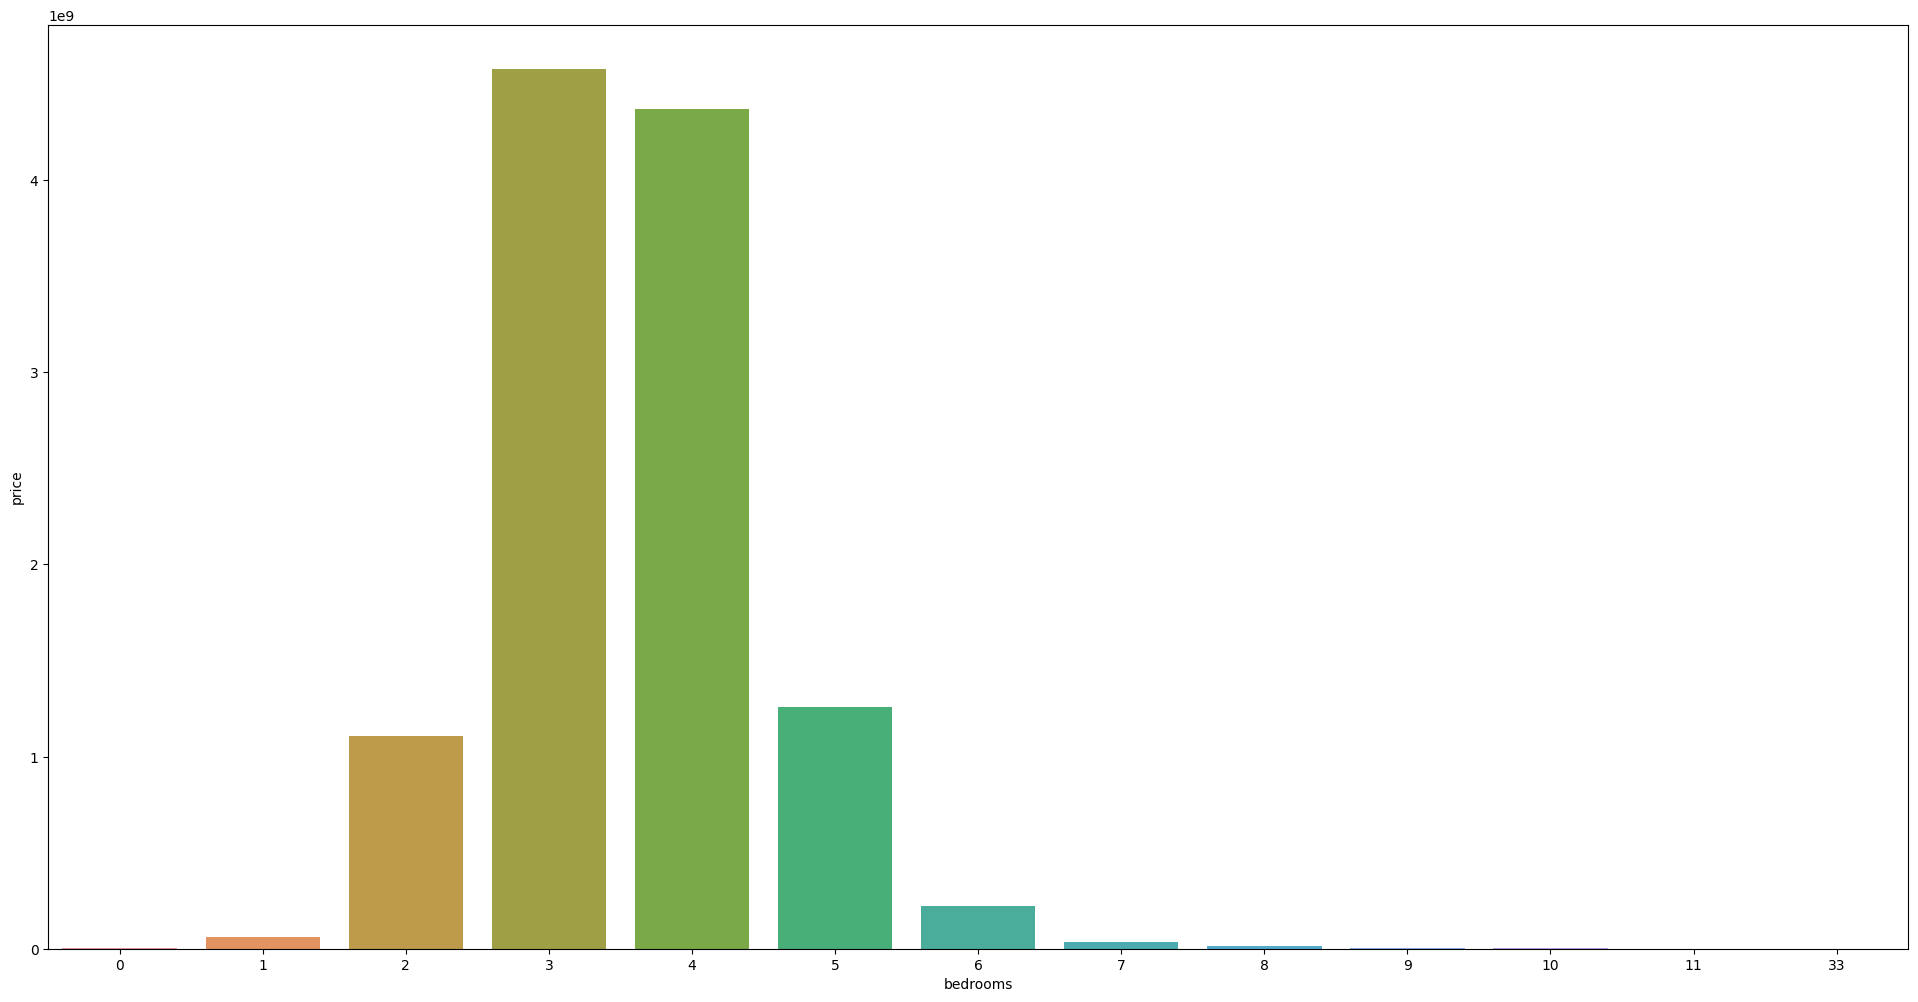

In [8]:
plt.figure( figsize=(24,12))
df = data[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=df );

#  2. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

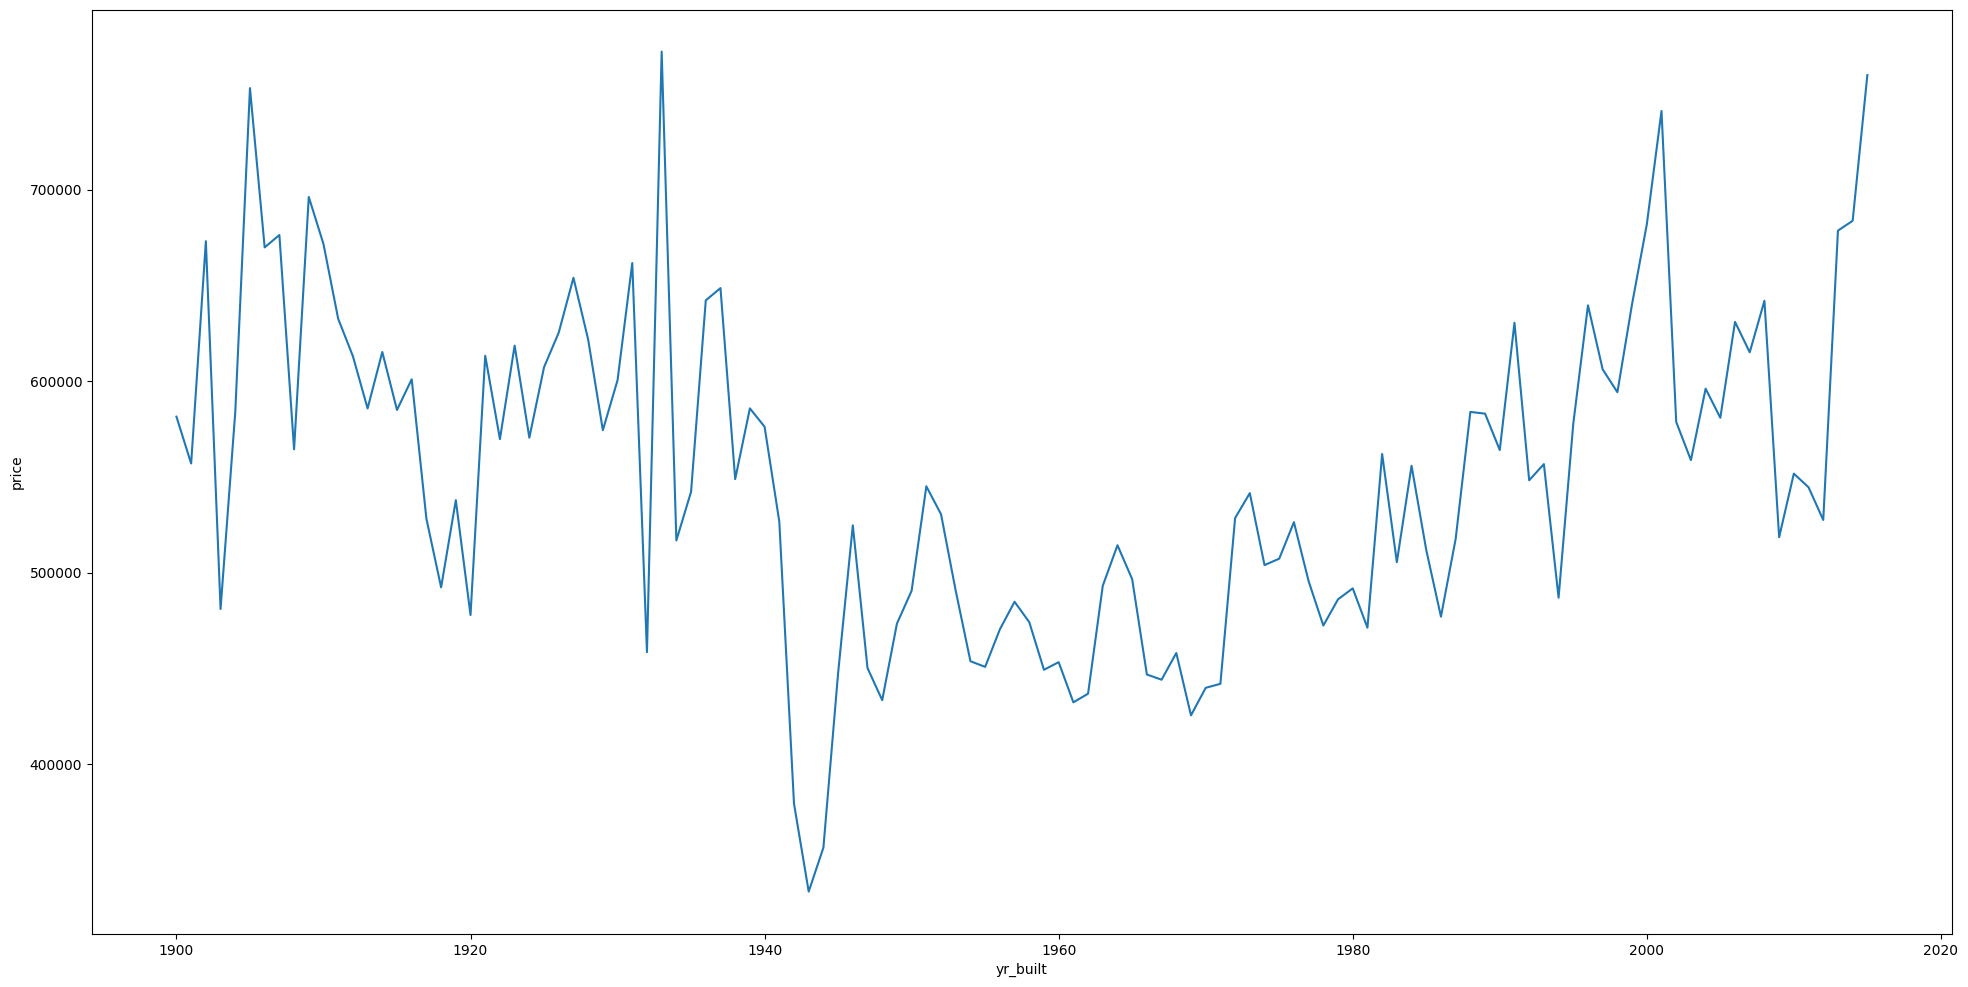

In [9]:
plt.figure( figsize=(24,12))
df = data[['price','yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(x='yr_built' ,y='price', data=df);


In [10]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dormitory_type'],
      dtype='object')

# 3. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

<AxesSubplot: xlabel='price', ylabel='dormitory_type'>

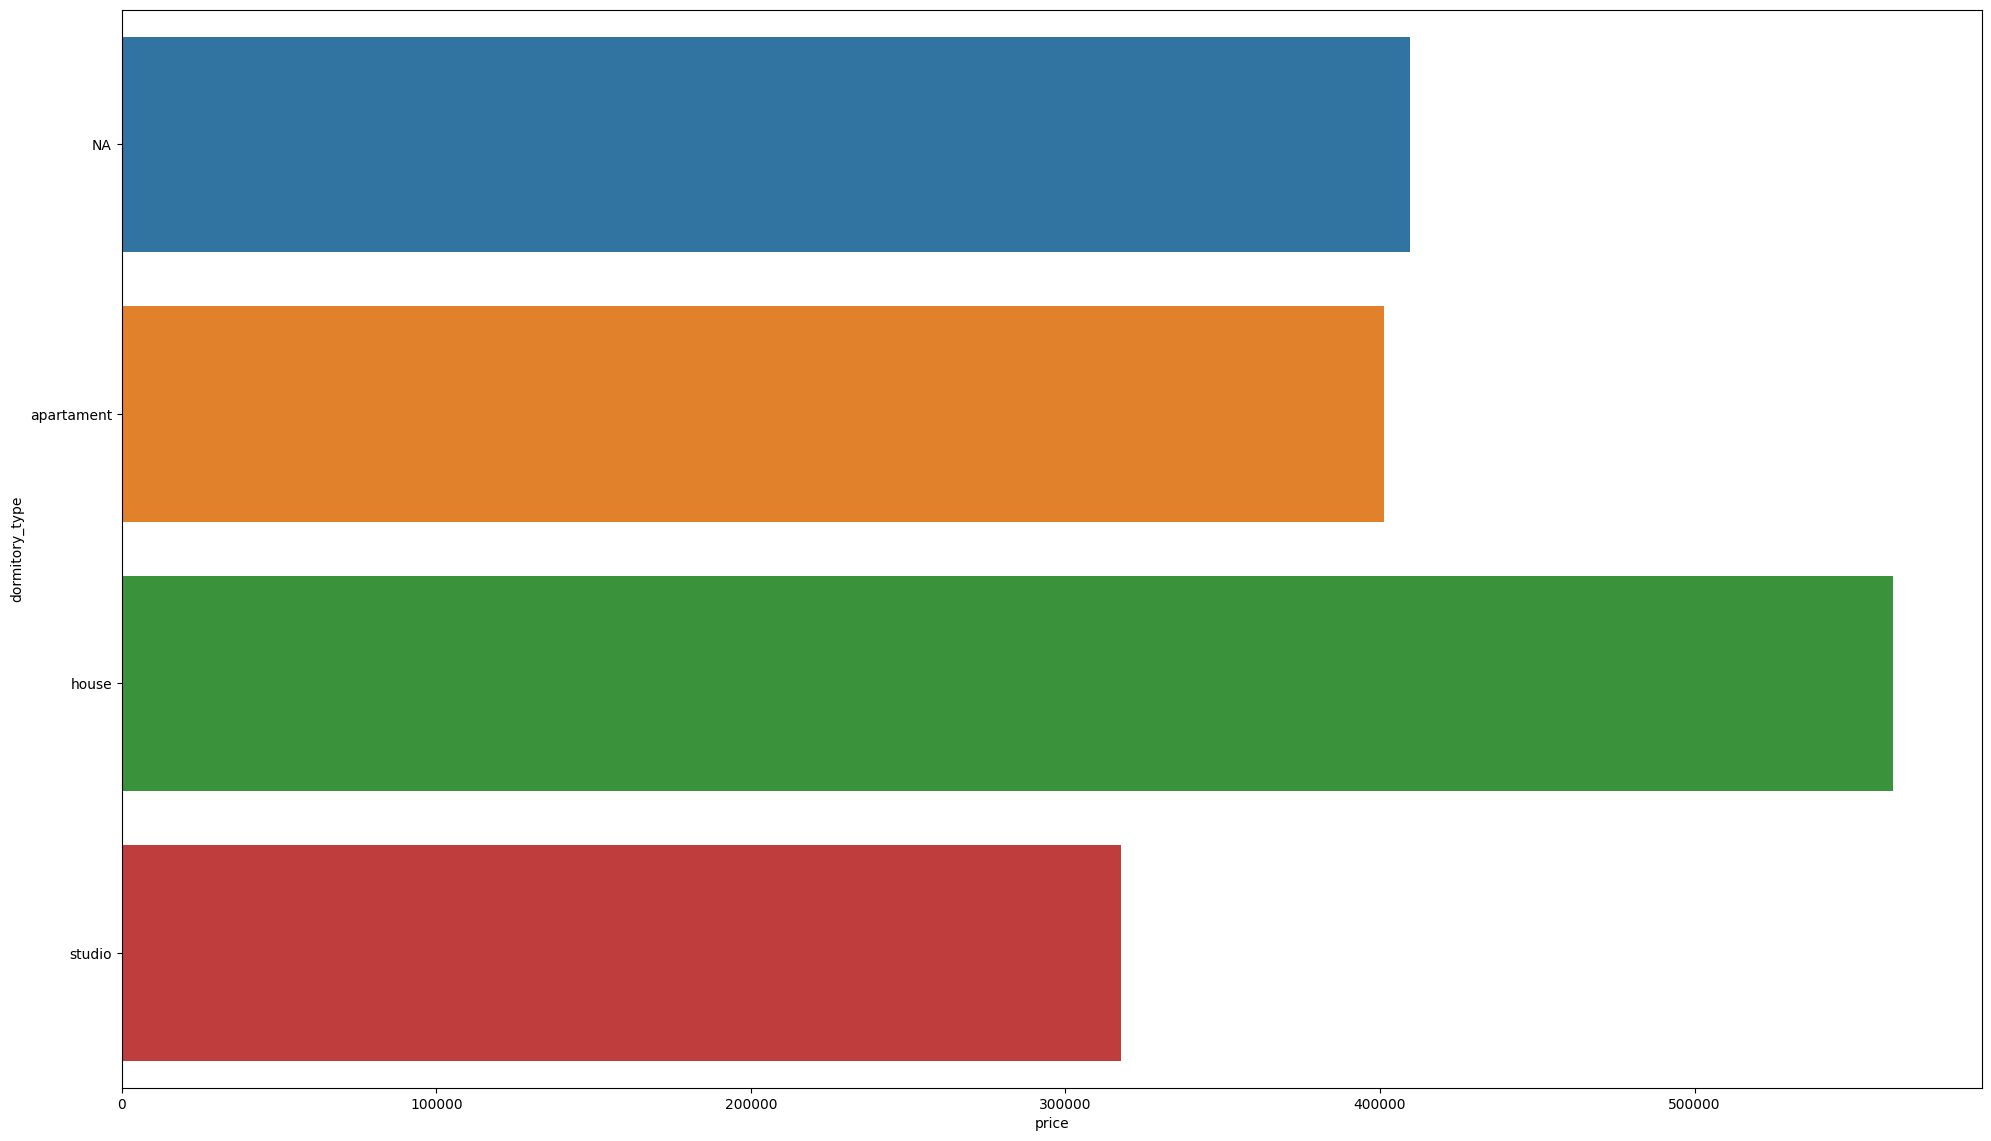

In [11]:
plt.figure(figsize=(24,14)) 
df = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
sns.barplot(x='price',y='dormitory_type', data=df)

# 4. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos móveis, a partir do ano de 1930.

<AxesSubplot: xlabel='yr_renovated', ylabel='price'>

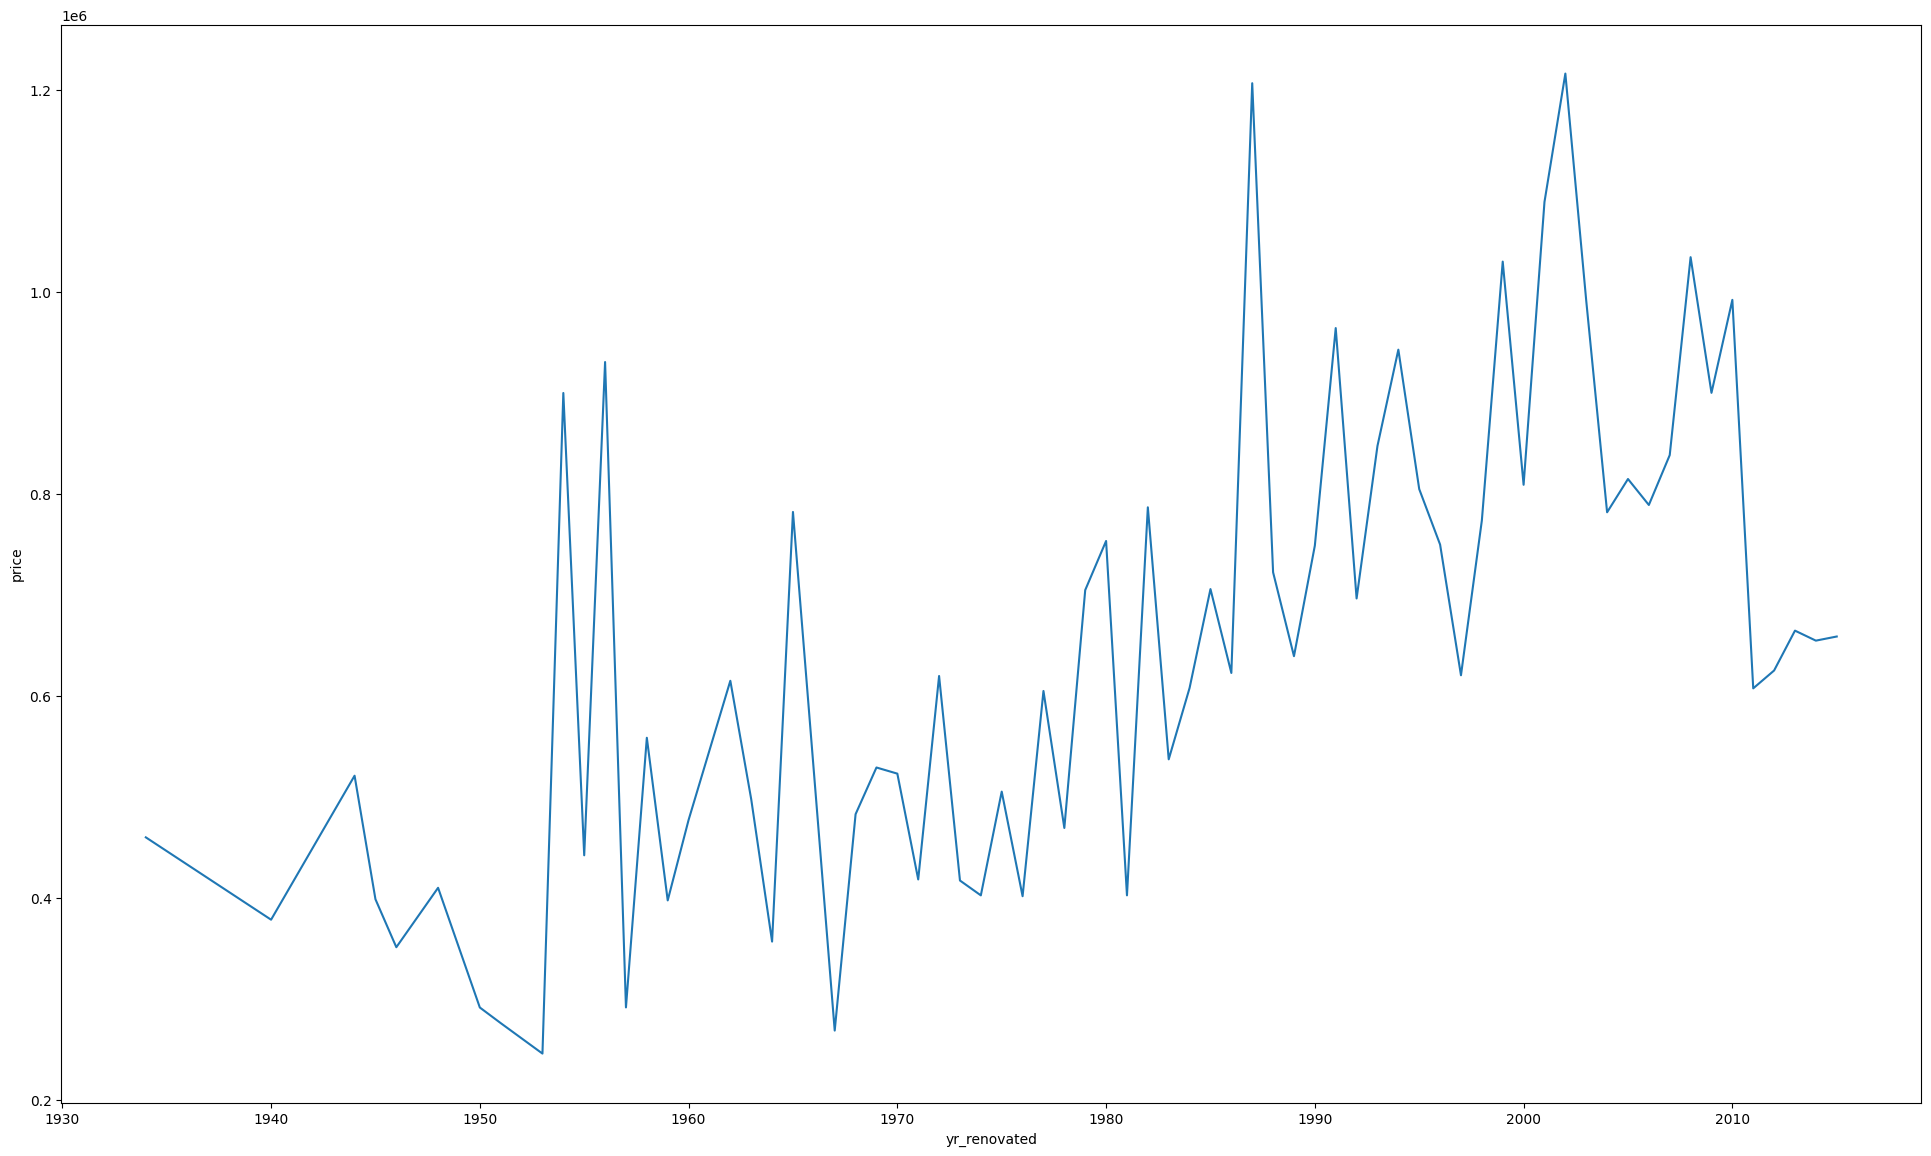

In [12]:
plt.figure(figsize=(24,14)) 
df = data.loc[data['yr_renovated'] > 1930, ['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.lineplot(x='yr_renovated',y='price', data=df)


# 5. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [13]:
df = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
df.head()

,dormitory_type,price
0,NA,409503.85
1,apartament,401372.68
2,house,563092.21
3,studio,317642.88


 # 6 Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas ) 

<BarContainer object of 13 artists>

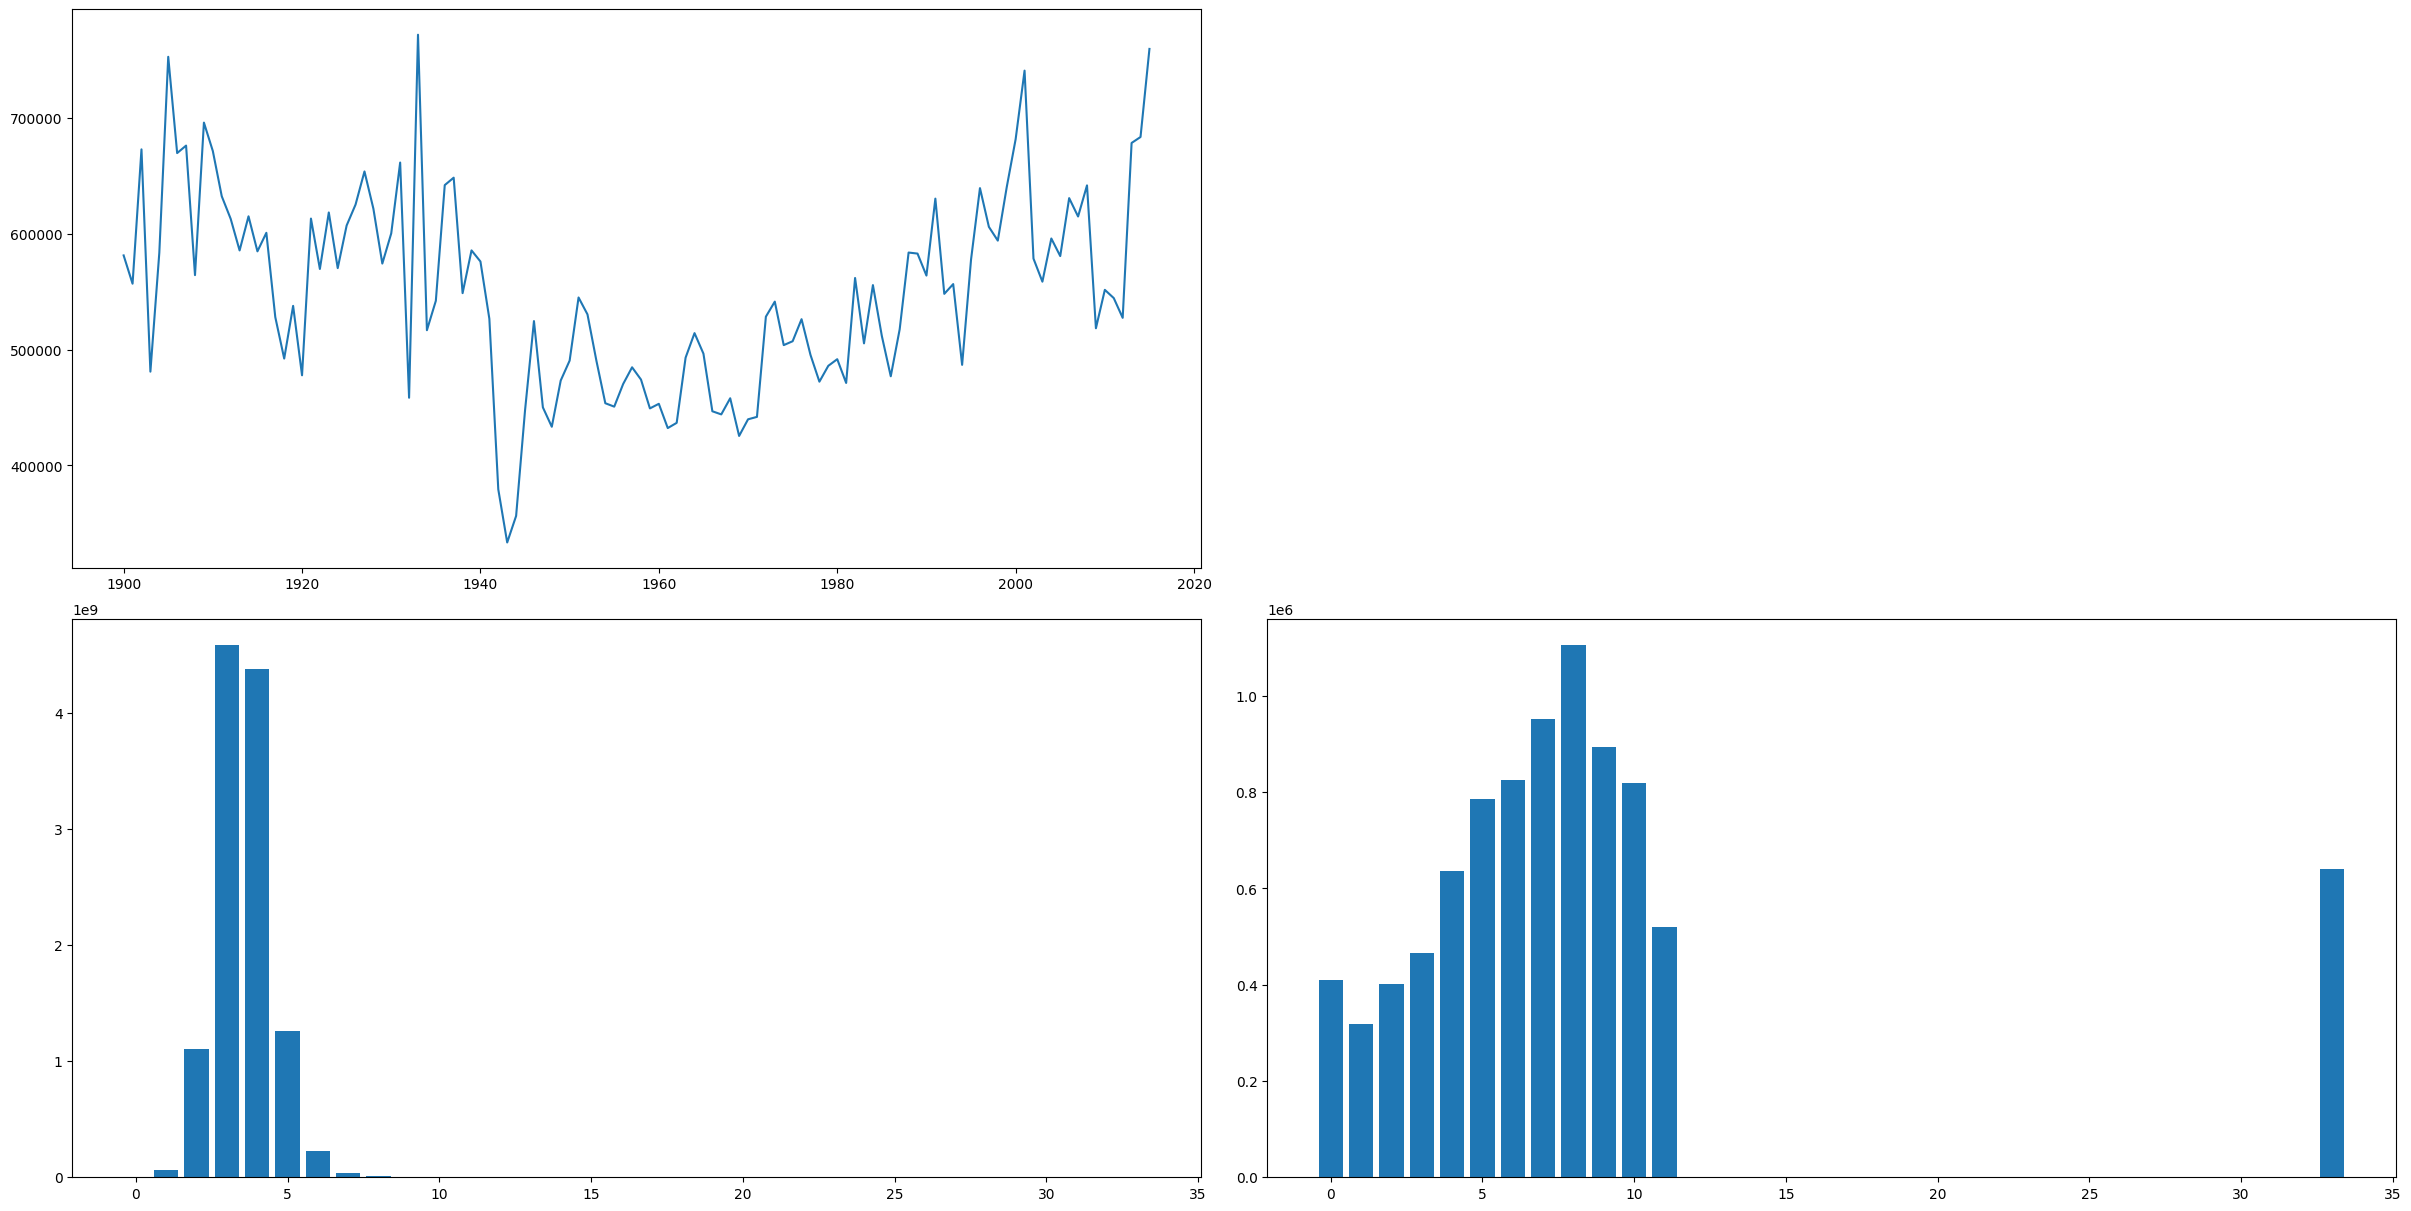

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(24,12))

spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])
ax3 = fig.add_subplot(spec[1, 1])

# Questão 2

df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(df['yr_built'], df['price'])

# Questão 3

df = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
ax2.bar(df['bedrooms'], df['price'])

# Questão 4

df = data[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
ax3.bar(df['bedrooms'], df['price'])
















 # 7 Crie um Dashboard com os gráficos das questões 02, 04 ( Dashboard: 2 colunas ) 

<BarContainer object of 13 artists>

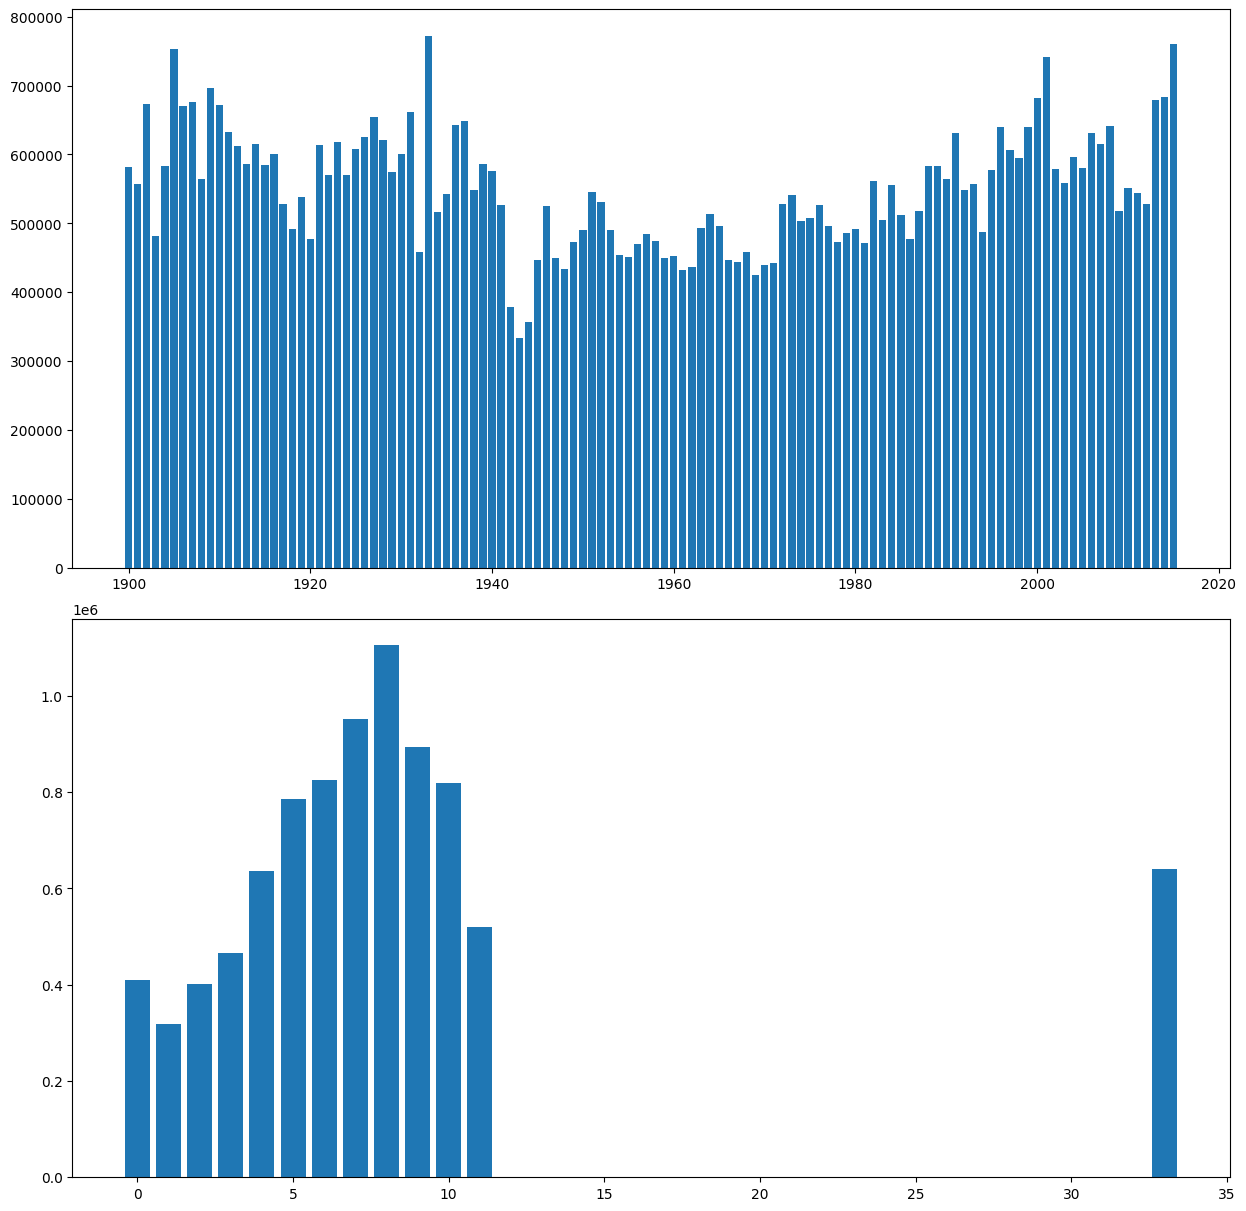

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(24,12))

spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])

# Questão 2

df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.bar(df['yr_built'], df['price'])

# Questão 4

df = data[['price', 'bedrooms']].groupby('bedrooms').mean().reset_index()
ax2.bar(df['bedrooms'], df['price'])




# 8 Crie um Dashboard com os gráficos das questões 03, 05  ( Dashboard: 2 linhas) 

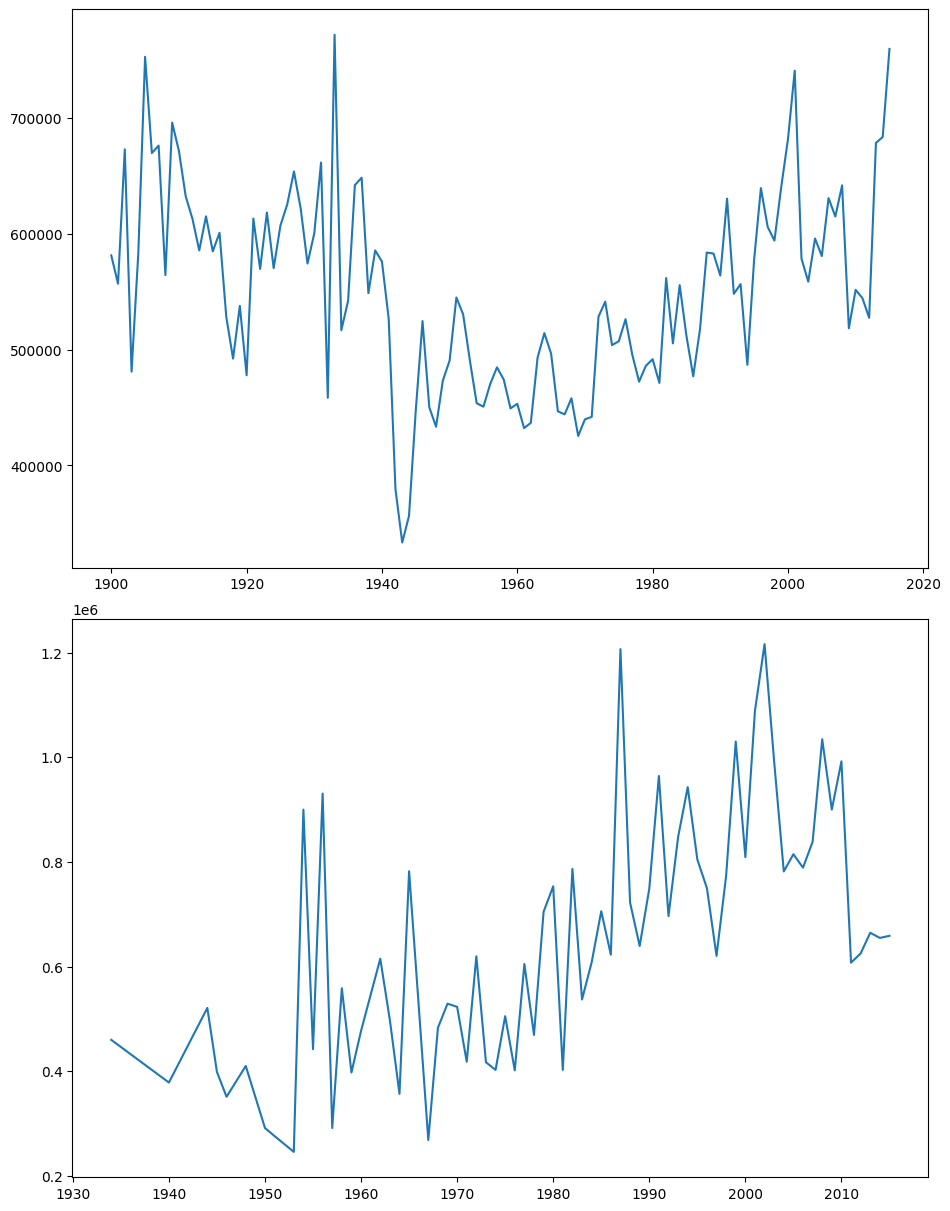

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(18,12))

spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[1, 0])

# Questão 03

df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(df['yr_built'], df['price'])

# Questão 05

df = data.loc[data['yr_renovated'] > 1930, ['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(df['yr_renovated'],df['price']);



In [18]:
import plotly.express as px 

houses = data[['id','lat','long','price','sqft_living']].copy()

fig = px.scatter_mapbox(houses, 
                lat="lat", 
                lon="long",
                size='sqft_living',
                color_continuous_scale=px.colors.cyclical.IceFire, 
                size_max=15, 
                zoom=10,)

fig.update_layout( mapbox_style ='open-street-map')
fig.update_layout( height=600 , margin={ 'r':0, 'l': 0, 't':0, 'b': 0})

fig.show()




ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed